In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 省略plt.show()
%matplotlib inline

# matplotlib常见图形绘制

Matplotlib能够绘制折线图、条形图、直方图、散点图、饼图等。

## 1 折线图

* 折线图：以折线的上升或下降来表示统计数量的增减变化的统计图

* 特点：能够显示数据的变化趋势，反映事物的变化情况。(变化)


* api：plt.plot(x, y)


演示案例已在matplotlib基本使用小结中展示了。

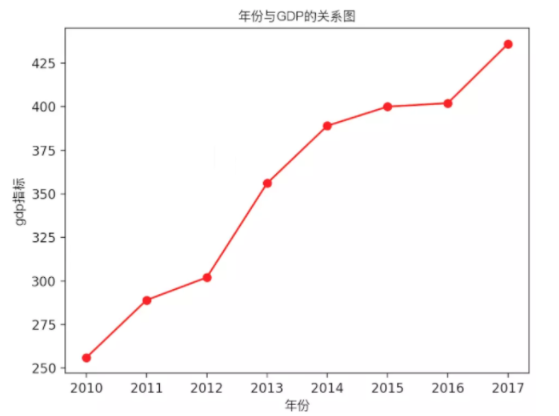

## 2 条形图

* 条形图：排列在工作表的列或行中的数据可以绘制到条形图中。

* 特点：绘制连离散的数据,能够一眼看出各个数据的大小,比较数据之间的差别。(统计/对比)


### 2.1 条形图的绘制

* api：plt.bar(x, height, width, bottom，align='center', **kwargs)
    * x：一个数组或者列表，代表需要绘制的条形图的x轴的坐标点
    * height：一个数组或者列表，代表需要绘制条形图的y轴的坐标点
    * width：每一个条形图的宽度，默认是0.8
    * bottom：y轴的基线，默认是0
    * align：对齐方式，默认是center
    * **kwargs：其他的参数设置，比如设置颜色color等
    

比如我们现在有2019年贺岁片票房的数据，用条形图来绘制每部电影以及票房数据

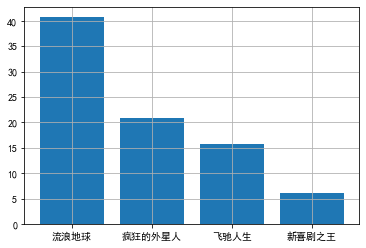

In [2]:
# 读取票房数据
movies = {"流浪地球": 40.78,
          "疯狂的外星人": 20.83,
          "飞驰人生": 15.77,
          "新喜剧之王": 6.10}

# 绘制条形图
plt.bar(np.arange(len(movies)), list(movies.values()))
plt.xticks(np.arange(len(movies)), list(movies.keys()))
plt.grid(True)

### 2.2 横向条形图

* 横向条形图需要使用plt.barh这个方法跟bar非常的类似，只不过把方向进行旋转。参数跟bar类似，但也有区别。如下：
    
    * y：数组或列表，代表需要绘制的条形图在y轴上的坐标点。
    * width：数组或列表，代表需要绘制的条形图在x轴上的值（也就是长度）。
    * height：条形图的高度，默认是0.8。
    * left：条形图的基线，也就是距离y轴的距离。


还是用票房数据进行演示：

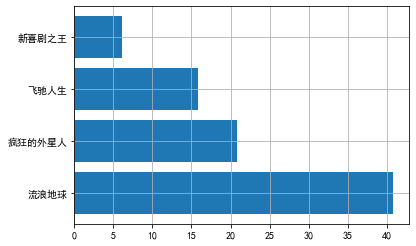

In [3]:
# 读取票房数据
movies = {"流浪地球": 40.78,
          "疯狂的外星人": 20.83,
          "飞驰人生": 15.77,
          "新喜剧之王": 6.10}

# 绘制条形图
plt.barh(np.arange(len(movies)), list(movies.values()))
plt.yticks(np.arange(len(movies)), list(movies.keys()))
plt.grid(True)

### 2.3 分组条形图

现在有一组数据，是电影票房的前5天票房记录，现在想用分组条形图进行展示。

([<matplotlib.axis.XTick at 0x2042140d888>,
 <a list of 4 Text xticklabel objects>)

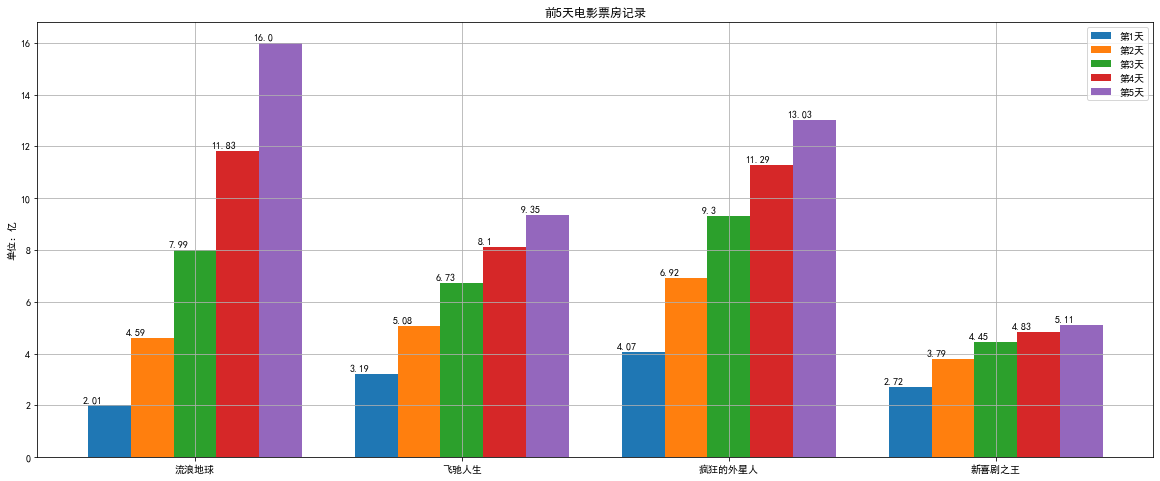

In [4]:
# 获取电影票房的前5天数据
movies = {
    "流浪地球": [2.01, 4.59, 7.99, 11.83, 16],
    "飞驰人生": [3.19, 5.08, 6.73, 8.10, 9.35],
    "疯狂的外星人": [4.07, 6.92, 9.30, 11.29, 13.03],
    "新喜剧之王": [2.72, 3.79, 4.45, 4.83, 5.11]}

# 创建画布
plt.figure(figsize=(20, 8))

# 每一个电影x轴的中心点
ind = np.arange(len(movies))

# 计算单个电影单个柱状（每一天）的长度
width = 0.8
bin_width = width / 5

# 用DataFrame存储数据
movie_pd = pd.DataFrame(movies)


# 对每一天的票房进行绘制条形图，index为[0,1,2,3,4]表示前5天
for index in movie_pd.index:
    # 第n天的每个电影的y轴票房数据
    day_tickets = movie_pd.iloc[index]

    # 每个电影的第n天时x轴的位置
    xs = ind - (bin_width * (2 - index))

    # 进行条形图绘制，并标清楚label
    plt.bar(xs, day_tickets, width=bin_width, label="第{}天".format(index + 1))

    # 标记票房数据
    for ticket, x in zip(day_tickets, xs):
        plt.annotate(ticket, xy=(x, ticket), xytext=(x-0.1, ticket+0.1))

# 设置描述信息
plt.legend()
plt.ylabel("单位：亿")
plt.title("前5天电影票房记录")
plt.grid(True)

# 设置x轴的坐标
plt.xticks(ind, movie_pd.columns)

### 2.4 堆叠条形图

堆叠柱形图可以用来直观说明在同一组或同一类在不同的划分标准下的表现情况，如下图案例：

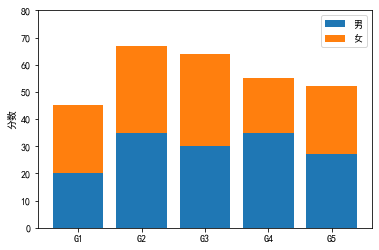

In [5]:
# 获取数据和分组信息
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
groupNames = ('G1', 'G2', 'G3', 'G4', 'G5')

# 获取x轴
xs = np.arange(len(menMeans))

# 绘制堆叠柱形图
plt.bar(xs, menMeans, label='男')
plt.bar(xs, womenMeans, bottom=menMeans, label='女')

# 设置描述信息
plt.ylabel('分数')
plt.xticks(xs, groupNames)
plt.yticks(np.arange(0, 81, 10))
plt.legend()

在绘制女性得分的条形图的时候，因为要堆叠在男性得分的条形图上，所以使用到了一个bottom参数，就是距离x轴的距离。通过对贴条形图，我们就可以清楚的知道，哪一个队伍的综合排名是最高的，并且在每个队伍中男女的得分情况。

## 3 直方图

* 直方图：由一系列高度不等的纵向条纹或线段表示数据分布的情况。 一般用横轴表示数据范围，纵轴表示分布情况。

* 特点：绘制连续性的数据展示一组或者多组数据的分布状况(统计)


* api：plt.hist(x, bins, range, density, cumulative, **kwargs)
    * 参数：
        * x: 数组或可以循环的序列。直方图将会从这组数据中进行分组。
        * bins: 数字或序列。
            * 数字：代表分成多少组。
            * 序列：按照序列指定的值进行分组，比如序列[1,2,3,4],那么分组将会分成3组，分别是[1,2),[2,3),[3,4]。
        * range:元祖或None。如果是元祖，那么指定x划分区间的最大值和最小值。
        * density: 默认是False。如果是True，那么将使用频率分布直方图。每个条形表示的不是个数，而是 频率/组距。
        * cumulative: 如果这个和density都等于True, 那么返回值的第一个参数会不断的累加，最终等于1。
        *  **kwargs: 其他参数，详细可看文档。
    * 返回值：
        * n: 数组。每个区间内值出现的个数，如果density=True,那么返回的是 频率/组距。
        * bins: 数组。区间的值。
        * patches: 数组。
        
        
假设我们有一组电影时长的数据，现在想要用直方图来进行查看

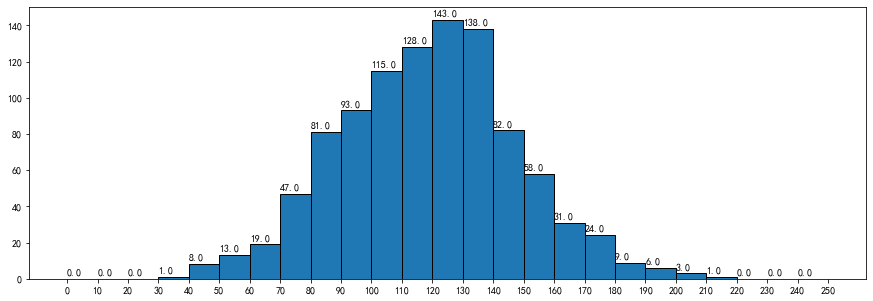

In [6]:
# 获取电影时长的数据
movies_time = np.random.normal(120, 30, 1000)

# 创建画布
plt.figure(figsize=(15, 5))

# 设置区间范围
bins = range(0, 260, 10)

# 进行直方图的绘制
nums, bins, patches = plt.hist(movies_time, bins=bins, edgecolor='k')

# 添加x轴信息
plt.xticks(bins, bins)

# 添加每组的数据描述
for num, bin in zip(nums, bins):
    plt.annotate(num, xy=(bin, num), xytext=(bin, num+2))

## 4 散点图

* 散点图：用两组数据构成多个坐标点，考察坐标点的分布,判断两变量之间是否存在某种关联或总结坐标点的分布模式。

* 特点：判断变量之间是否存在数量关联趋势,展示离群点(分布规律)


* api：plt.scatter(x,y,s,c,marker,**kwargs)
    * x,y: 分别是x轴和y轴的值。两者的数据长度必须一致。
    * s: 点的尺寸，数字或序列。
        * 数字：一个具体的数字代表散点图的所有点都是一样大小。
        * 序列：序列的长度应该和x轴数量一致。
    * c：c的颜色，默认是蓝色。
    * marker: 标记点，默认是原点。
    * **kwargs:其他参数。
    

假设我们有2组数据，用散点图进行绘制：

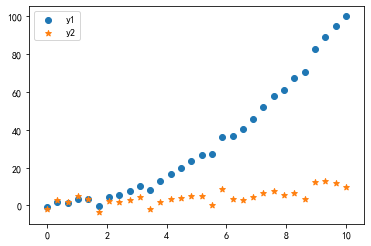

In [7]:
# 产生0-10之间30个元素的等差数列
x = np.linspace(0, 10, 30)

# 产生30个标准正态分布的元素
noise = np.random.randn(30)

# 产生叠加噪声的数据系列1
y1 = x**2 + 2 * noise

# 产生叠加噪声的数据系列2
y2 = x + 3 * noise

# 创建画布
plt.figure(figsize=(6, 4))


# 绘制散点图
plt.scatter(x, y1, marker='o', label='y1')
plt.scatter(x, y2, marker='*', label='y2')

# 添加图例
plt.legend(loc=0)

## 5 饼状图

* 饼状图：用于表示不同分类的占比情况，通过弧度大小来对比各种分类。

* 特点：分类数据的占比情况(占比)


* api：plt.pie(x, labels,explode,autopct,shadow,textprops,colors)
    * 参数：
        * x：饼图的比例序列。
        * labels：饼图上每个分块的名称文字。
        * explode：设置某几个分块是否要分离饼图。
        * autopct：设置比例文字的展示方式。比如保留几个小数等。
        * shadow：是否显示阴影。
        * textprops：文本的属性（颜色，大小等）。
        * colors:每部分的颜色
    * 返回值：
        * patches:饼图上每个分块的对象
        * texts：分块的名字文本对象
        * autotexts：分块的比例文字对象
    

假如我们现在有一组数据，用来记录各个操作系统的市场份额，那么用饼图表示如下：

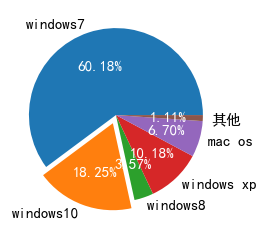

In [8]:
# 获取数据
os = {'windows7': 60.86,
      'windows10': 18.46,
      'windows8': 3.61,
      'windows xp': 10.3,
      'mac os': 6.78,
      '其他': 1.12}

# 获取名字的key和value
names = os.keys()
percents = os.values()

# 进行饼图的绘制
patches, texts, autotexts = plt.pie(
    percents, labels=names, autopct="%.2f%%", explode=[0, 0.1, 0, 0, 0, 0])

# 可以对饼图里面的内容进行修改，比如修改autotexts的颜色为白色
for text in autotexts:
    text.set_color('White')

# 修改所有字体的大小
for text in texts+autotexts:
    text.set_fontsize(15)